In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactive="all"

In [14]:
data = pd.read_csv("/content/drive/MyDrive/Ciencia de Dados/Aprendizado de maquina/marketing.csv", delimiter='\t')

In [4]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
data.drop('ID',axis='columns', inplace=True)

In [15]:
#Spending variable creation
data['Age']=2014-data['Year_Birth']

data['Spending']= data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']
#Seniority variable creation
last_date = datetime.date(2014,10, 4)
data['Seniority'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
#data['Marital_Status']=data['Marital_Status'].replace({'Divorced': 0,'Single': 0,'Married': 1,'Together': 1,'Absurd':0,'Widow': 0,'YOLO': 0, 'Alone': 0}) # 0 alone, 1 in-couple
#data['Education']=data['Education'].replace({'Basic': 0,'2n Cycle': 0,'Graduation':1,'Master': 1,'PhD': 1})

data['Children']=data['Kidhome']+data['Teenhome']
data['Has_child'] = np.where(data.Children> 0, 1, 0)
#data['Children'].replace({3: "3",2:'2',1:'1 child',0:"No child"},inplace=True)
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets'})


data=data[['Age','Education','Marital_Status','Income','Spending','Seniority','Has_child','Children','Wines','Fruits','Meat','Fish','Sweets']]
data.head()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets
0,57,Graduation,Single,58138.0,1529,25.333333,0,0,635,88,546,172,88
1,60,Graduation,Single,46344.0,21,7.000000,1,2,11,1,6,2,1
2,49,Graduation,Together,71613.0,734,13.633333,0,0,426,49,127,111,21
3,30,Graduation,Together,26646.0,48,7.866667,1,1,11,4,20,10,3
4,33,PhD,Married,58293.0,407,8.600000,1,1,173,43,118,46,27


In [16]:
data.isnull().sum()

Age                0
Education          0
Marital_Status     0
Income            24
Spending           0
Seniority          0
Has_child          0
Children           0
Wines              0
Fruits             0
Meat               0
Fish               0
Sweets             0
dtype: int64

In [17]:
data.dropna(axis=0, how='any', thresh=None, subset=['Income'], inplace=True)

In [16]:
data.describe()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,45.183296,0.885327,0.645147,51969.861400,607.321445,15.016795,0.714221,0.947178,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684
std,11.987000,0.318698,0.478577,21526.320095,602.925291,6.749291,0.451887,0.749230,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660
min,18.000000,0.000000,0.000000,1730.000000,5.000000,3.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.000000,0.000000,35284.000000,69.000000,9.233333,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,44.000000,1.000000,1.000000,51373.000000,397.000000,15.066667,1.000000,1.000000,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000
75%,55.000000,1.000000,1.000000,68487.000000,1048.000000,20.866667,1.000000,1.000000,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000
max,121.000000,1.000000,1.000000,162397.000000,2525.000000,26.533333,1.000000,3.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [14]:
#OUTLIERS
data=data[data['Income']<600000]

In [18]:
amostra = data.sample(1000)

In [19]:
amostra.head()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets
1257,39,Graduation,Married,74190.0,577,4.833333,1,1,151,81,86,168,91
1107,44,2n Cycle,Married,15315.0,47,14.233333,0,0,7,4,13,15,8
225,36,Graduation,Together,42011.0,150,18.566667,1,1,131,0,16,2,1
640,54,Graduation,Together,63381.0,846,24.300000,1,1,571,50,142,33,50
2003,48,Graduation,Single,33279.0,16,3.800000,0,0,10,3,3,0,0


In [20]:
amostra.to_csv('marketing_amostra2.csv', index=False, encoding='utf-8')

In [ ]:
#normalização
scaler=StandardScaler()
dataset_temp=data[['Income','Spending','Seniority']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

In [ ]:
X = dataset_temp.iloc[:,0:3].values
X

array([[5.81380000e+04, 1.61700000e+03, 2.53333333e+01],
       [4.63440000e+04, 2.70000000e+01, 7.00000000e+00],
       [7.16130000e+04, 7.76000000e+02, 1.36333333e+01],
       ...,
       [5.69810000e+04, 1.24100000e+03, 8.40000000e+00],
       [6.92450000e+04, 8.43000000e+02, 8.43333333e+00],
       [5.28690000e+04, 1.72000000e+02, 2.39666667e+01]])

1 1026733691131.7633
2 319498185929.74976
3 183315109124.80078
4 122400546337.21198
5 81128026317.08182
6 53660906324.694824
7 40140507499.09918
8 31343916438.782074
9 23973407149.483772
10 19150428892.829758


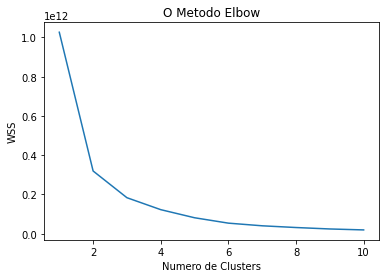

In [ ]:
from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[8.26943759e+04, 1.42049631e+03, 1.42562654e+01],
       [2.33615098e+04, 7.61525054e+01, 1.53261438e+01],
       [6.28065156e+04, 8.64958271e+02, 1.55188276e+01],
       [4.21689189e+04, 2.23796460e+02, 1.47670600e+01]])

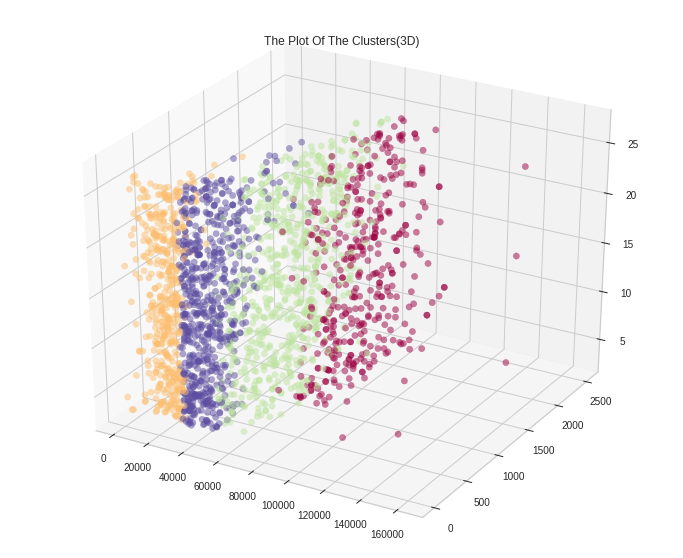

In [ ]:
x =dataset_temp["Income"]
y =dataset_temp["Spending"]
z =dataset_temp["Seniority"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=y_kmeans, marker='o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()